<a href="https://colab.research.google.com/github/thiagot3/Regress-o-Linear/blob/main/Regress%C3%A3o%20Linear%20Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Correlação Linear Simples

</br>
Código feito no Google Colab, o detaset usado está na pasta Arquivos da Aplicação

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [ ]:
df = {'tempo' : [1, 3, 4 , 4 , 6, 8, 10, 10, 11, 13],
      'vendas' : [91, 110, 106, 116, 119, 129, 139, 143, 138, 159]
}
df = pd.DataFrame(df)
df

,tempo,vendas
0,1,91
1,3,110
2,4,106
3,4,116
4,6,119
5,8,129
6,10,139
7,10,143
8,11,138
9,13,159


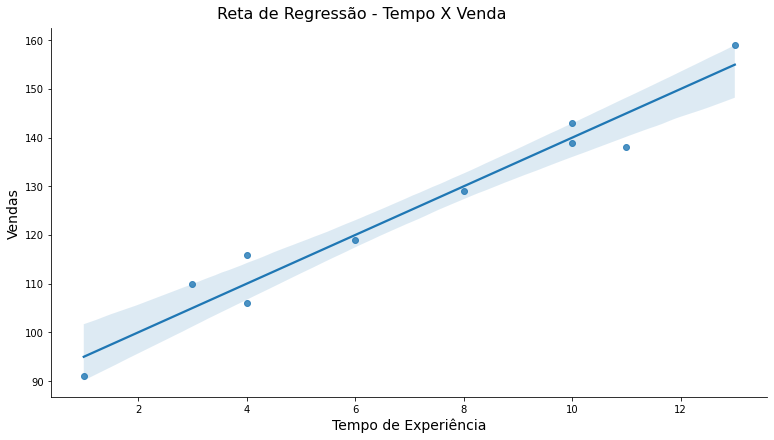

In [ ]:
ax = sns.lmplot(x = 'tempo', y = 'vendas', data= df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle("Reta de Regressão - Tempo X Venda", fontsize= 16, y= 1.02)
ax.set_xlabels("Tempo de Experiência", fontsize= 14)
ax.set_ylabels("Vendas", fontsize= 14)
ax;

In [ ]:
df.corr()

,tempo,vendas
tempo,1.000000,0.976883
vendas,0.976883,1.000000


In [ ]:
Y= df.vendas
X= sm.add_constant(df.tempo)

In [ ]:
reg_result = sm.OLS(Y, X).fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     167.1
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           1.22e-06
Time:                        23:56:33   Log-Likelihood:                -28.355
No. Observations:                  10   AIC:                             60.71
Df Residuals:                       8   BIC:                             61.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.0000      3.075     29.265      0.0

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
df["Y_predict"] = reg_result.predict()
df

,tempo,vendas,Y_predict
0,1,91,95.0
1,3,110,105.0
2,4,106,110.0
3,4,116,110.0
4,6,119,120.0
5,8,129,130.0
6,10,139,140.0
7,10,143,140.0
8,11,138,145.0
9,13,159,155.0


In [ ]:
df['residue'] =  df["Y_predict"] - df["vendas"]
df

,tempo,vendas,Y_predict,residue
0,1,91,95.0,4.0
1,3,110,105.0,-5.0
2,4,106,110.0,4.0
3,4,116,110.0,-6.0
4,6,119,120.0,1.0
5,8,129,130.0,1.0
6,10,139,140.0,1.0
7,10,143,140.0,-3.0
8,11,138,145.0,7.0
9,13,159,155.0,-4.0


### Exercício
O Ministério da Educação solicitou a você uma previsão do percentual de alunos que serão aprovados no ano de 2017, tendo como base o ano de 2016.



Crie um modelo que consiga prever o valor de aprovação em 2016 com as aprovações de 2015.



Faça todo tratamento de dados aprendido e faça a regressão linear e tire o resíduo para saber em quanto o modelo está errando.

In [ ]:
df_approved = pd.read_excel("/content/C+¦pia de aprovacao_alunos (1).xlsx")
df_approved

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76
5,Amapa,76,75
6,Tocantins,81,82
7,Maranhao,81,81
8,Piaui,80,81
9,Ceara,86,85


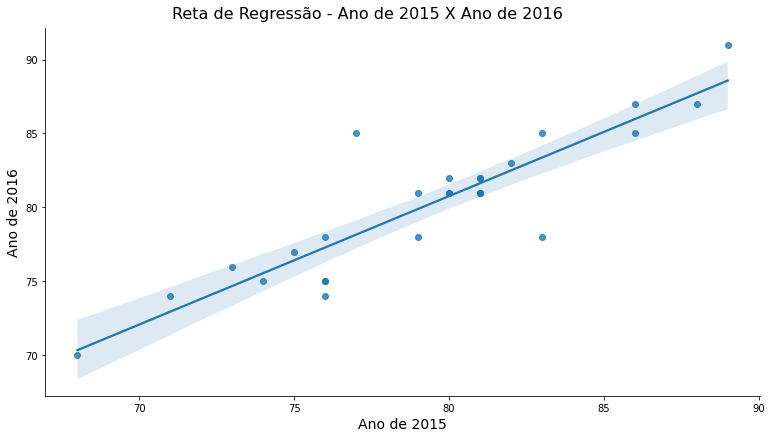

In [ ]:
ax = sns.lmplot(x = "ano_2015", y = "ano_2016", data= df_approved)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle("Reta de Regressão - Ano de 2015 X Ano de 2016", fontsize= 16, y= 1.02)
ax.set_xlabels("Ano de 2015", fontsize= 14)
ax.set_ylabels("Ano de 2016", fontsize= 14)
ax;

In [ ]:
df_approved.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [ ]:
Y= df_approved.ano_2016
X= sm.add_constant(df_approved.ano_2015)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
reg_result = sm.OLS(Y, X).fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           3.02e-10
Time:                        00:23:08   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [ ]:
df_approved["Y_predict"] = reg_result.predict()
df_approved

,UF,ano_2015,ano_2016,Y_predict
0,Rondonia,77,85,78.159571
1,Acre,79,81,79.895812
2,Amazonas,83,85,83.368294
3,Roraima,81,82,81.632053
4,Para,73,76,74.687089
5,Amapa,76,75,77.291450
6,Tocantins,81,82,81.632053
7,Maranhao,81,81,81.632053
8,Piaui,80,81,80.763932
9,Ceara,86,85,85.972655


In [ ]:
df_approved['residue'] =  df_approved["Y_predict"] - df_approved["ano_2016"]
df_approved

,UF,ano_2015,ano_2016,Y_predict,residue
0,Rondonia,77,85,78.159571,-6.840429
1,Acre,79,81,79.895812,-1.104188
2,Amazonas,83,85,83.368294,-1.631706
3,Roraima,81,82,81.632053,-0.367947
4,Para,73,76,74.687089,-1.312911
5,Amapa,76,75,77.291450,2.291450
6,Tocantins,81,82,81.632053,-0.367947
7,Maranhao,81,81,81.632053,0.632053
8,Piaui,80,81,80.763932,-0.236068
9,Ceara,86,85,85.972655,0.972655
